In [26]:
import cv2
import matplotlib.pyplot as plt

import yaml

In [27]:
# ---------- params ----------
IMG_PATH = ["internal_assets/dataset/Highway.png", "internal_assets/dataset/VietNam_street.png"]
DATA_YAML = "utils/args.yaml"   # Path to dataset yaml
INPUT_SIZE = (640, 640) 

In [28]:
with open(DATA_YAML, "r") as f:
    data_dict = yaml.safe_load(f)

names = data_dict["names"]   # dict {0:"person",1:"bicycle",...}


In [29]:
# ---------- utils ----------
def letterbox(img, new_shape=(640, 640), color=(114, 114, 114)):
    # img: BGR numpy (H, W, C) as loaded by cv2
    h0, w0 = img.shape[:2]
    new_h, new_w = new_shape
    r = min(new_h / h0, new_w / w0)
    new_unpad_w = int(round(w0 * r))
    new_unpad_h = int(round(h0 * r))
    # resize
    img_resized = cv2.resize(img, (new_unpad_w, new_unpad_h), interpolation=cv2.INTER_LINEAR)
    # compute padding
    dw = new_w - new_unpad_w
    dh = new_h - new_unpad_h
    top = int(round(dh / 2 - 0.1))
    bottom = int(round(dh / 2 + 0.1))
    left = int(round(dw / 2 - 0.1))
    right = int(round(dw / 2 + 0.1))
    img_padded = cv2.copyMakeBorder(img_resized, top, bottom, left, right,
                                    cv2.BORDER_CONSTANT, value=color)
    return img_padded, r, (left, top)


In [30]:
def letterbox_visualize(img_path: str = IMG_PATH[0], new_shap: tuple = INPUT_SIZE):
    img_bgr = cv2.imread(img_path) #np.array (H, W, 3)
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found: {img_path}")

    orig_h, orig_w = img_bgr.shape[:2] #np.array (H, W)
    img_pad, gain, (pad_w, pad_h) = letterbox(img_bgr, new_shape=(640, 640))

    # Convert BGR (OpenCV) → RGB (for matplotlib)
    img_rgb = cv2.cvtColor(img_pad, cv2.COLOR_BGR2RGB)


            # --- Plot the padded image ---
    plt.figure(figsize=(8, 8))
    plt.imshow(img_rgb)
    plt.title(f"Letterboxed image\nGain: {gain:.3f}, Pad: ({pad_w}, {pad_h})")
    plt.axis("off")
    plt.show()

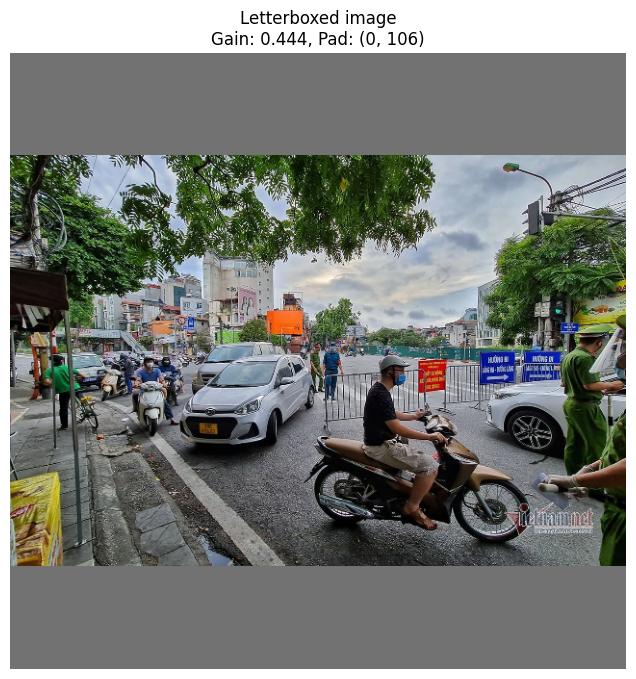

In [31]:
letterbox_visualize(IMG_PATH[1])